# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [41]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,income_group
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,very high
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,medium
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,high
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,very high
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,high
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью,very high
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью,very high
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования,medium
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы,low
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью,high


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [34]:
# Матрица корреляций
correlation = data.corr()
print(correlation.round(2))

                  children  days_employed  dob_years  education_id  \
children              1.00          -0.24      -0.31         -0.03   
days_employed        -0.24           1.00       0.59          0.08   
dob_years            -0.31           0.59       1.00          0.07   
education_id         -0.03           0.08       0.07          1.00   
family_status_id     -0.16           0.00      -0.07          0.01   
debt                  0.02          -0.04      -0.07          0.05   
total_income          0.03          -0.14      -0.06         -0.17   

                  family_status_id  debt  total_income  
children                     -0.16  0.02          0.03  
days_employed                 0.00 -0.04         -0.14  
dob_years                    -0.07 -0.07         -0.06  
education_id                  0.01  0.05         -0.17  
family_status_id              1.00  0.02         -0.01  
debt                          0.02  1.00         -0.01  
total_income                 -0.01 -0.01

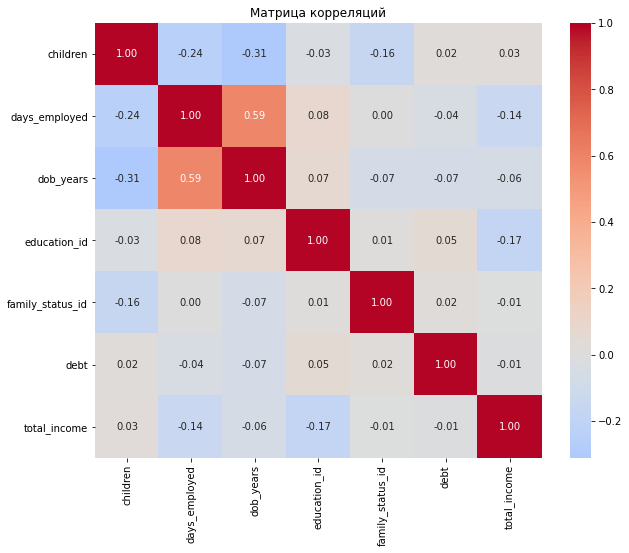

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [36]:
# Таблица сопряженности
children_debt = pd.crosstab(data['children'], data['debt'])
print("Количество просрочек по количеству детей:")
print(children_debt)

children_debt_pct = pd.crosstab(data['children'], data['debt'], normalize='index') * 100
print("\nПроцент просрочек по количеству детей:")
print(children_debt_pct.round(2))

Количество просрочек по количеству детей:
debt          0     1
children             
0         13028  1063
1          4364   444
2          1858   194
3           303    27
4            37     4
5             9     0

Процент просрочек по количеству детей:
debt           0     1
children              
0          92.46  7.54
1          90.77  9.23
2          90.55  9.45
3          91.82  8.18
4          90.24  9.76
5         100.00  0.00


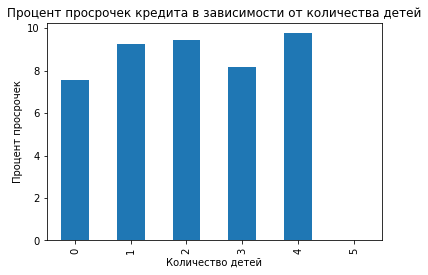

In [37]:
# Визуализация процентного соотношения
children_debt_pct[1].plot(kind='bar')
plt.title('Процент просрочек кредита в зависимости от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Процент просрочек')
plt.show()

**Вывод:** У бездетных клиентов процент просрочек является самым низким. Хотя семьи с детьми от 1-4 имеют показатель немного выше. По семьям с 5 детьми нельзя сделать никаких выводов, т.к. выборка достаточно маленькая для анализа.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [38]:
family_debt = pd.crosstab(data['family_status'], data['debt'])
print("Количество просрочек по семейному положению:")
print(family_debt)

family_debt_pct = pd.crosstab(data['family_status'], data['debt'], normalize='index') * 100
print("\nПроцент просрочек по семейному положению:")
print(family_debt_pct.round(2))

Количество просрочек по семейному положению:
debt                       0    1
family_status                    
Не женат / не замужем   2523  273
в разводе               1105   84
вдовец / вдова           888   63
гражданский брак        3749  385
женат / замужем        11334  927

Процент просрочек по семейному положению:
debt                       0     1
family_status                     
Не женат / не замужем  90.24  9.76
в разводе              92.94  7.06
вдовец / вдова         93.38  6.62
гражданский брак       90.69  9.31
женат / замужем        92.44  7.56


**Вывод:** Разница в процентах просрочек (около 3%) не настолько велика, чтобы этот фактор играл значительную роль.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [39]:
income_debt = pd.crosstab(data['total_income_category'], data['debt'])
print("Количество просрочек по уровню дохода:")
print(income_debt)

income_debt_pct = pd.crosstab(data['total_income_category'], data['debt'], normalize='index') * 100
print("\nПроцент просрочек по уровню дохода:")
print(income_debt_pct.round(2))

Количество просрочек по уровню дохода:
debt                       0     1
total_income_category             
A                         23     2
B                       4660   354
C                      14568  1353
D                        328    21
E                         20     2

Процент просрочек по уровню дохода:
debt                       0     1
total_income_category             
A                      92.00  8.00
B                      92.94  7.06
C                      91.50  8.50
D                      93.98  6.02
E                      90.91  9.09


**Вывод:** Нельзя сделать однозначный вывод о линейной зависимости между уровнем дохода и возвратом кредита в срок, так как распределение просрочек достаточно равномерное между категориями. Плюс ко всему выборка не однородна, категории А и Е обладают маленьким количеством данных.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [40]:
purpose_debt = pd.crosstab(data['purpose_category'], data['debt'])
print("Количество просрочек по целям кредита:")
print(purpose_debt)

purpose_debt_pct = pd.crosstab(data['purpose_category'], data['debt'], normalize='index') * 100
print("\nПроцент просрочек по целям кредита:")
print(purpose_debt_pct.round(2))

Количество просрочек по целям кредита:
debt                         0    1
purpose_category                   
операции с автомобилем    3879  400
операции с недвижимостью  9971  780
получение образования     3619  369
проведение свадьбы        2130  183

Процент просрочек по целям кредита:
debt                          0     1
purpose_category                     
операции с автомобилем    90.65  9.35
операции с недвижимостью  92.74  7.26
получение образования     90.75  9.25
проведение свадьбы        92.09  7.91


**Вывод:** Здесь так же видно, что распредление просрочек равномерное между целями кредита. Однако можно выделить, что операции с недвижимостью и получение образование имеет показатель на 2% меньше. Возможно это связано с суммой кредита.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Зависит от типа данных. Пропуски могут быть случайными и неслучайными.


Случайные пропущенные значения — не связаны с данными и их возникновение невозможно интерпретировать и проанализировать. Например, при участии в опросе, респондент пропустил вопрос из-за того, что не заметил его в анкете.


Закономерные пропущенные значения — связаны с особенностями данных. Например, если в опросе респонденты пропускали ответ на чувствительный для него вопрос.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* На медиану не влияют аномалии в данных(выбросы и шумы).

### Шаг 4: общий вывод.

Сильной корреляции между переменными нет. Однозначных выводов сделать нельзя.